# COVID-19 Mortality Prediction with Support Vector Regression Model

### Dependencies importing

In [1]:
# Auto reload imported module every time a jupyter cell is executed
%load_ext autoreload
%autoreload 2
### TBE -> To Be Engineering...
# covid_ts_pred package
from covid_ts_pred.c_eng.engineering import *

project env_path /Users/tekyteka/code/Teky-Teka/covid_ts_pred/.env
project env_path /Users/tekyteka/code/Teky-Teka/covid_ts_pred/covid_ts_pred/.env


In [2]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
 #sklearn preproc
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [4]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [5]:
### TBE done!
country='United Kingdom'

In [6]:
### TBE done!
data_index = pd.read_csv(get_csv_out_path(f'index_{country}.csv'))

In [7]:
### TBE done!
data = pd.read_csv(get_csv_out_path(f'indicator_{country}.csv'))

In [8]:
data=data.set_index('date')

In [9]:
data['day-1']=data['total_deaths'].shift(periods=1)
data['day-2']=data['total_deaths'].shift(periods=2)
data['day-3']=data['total_deaths'].shift(periods=3)
data['day-4']=data['total_deaths'].shift(periods=4)
data['day-5']=data['total_deaths'].shift(periods=5)
data['day-6']=data['total_deaths'].shift(periods=6)
data['day-7']=data['total_deaths'].shift(periods=7)
data['day-8']=data['total_deaths'].shift(periods=8)
data['day-9']=data['total_deaths'].shift(periods=9)
data['day-10']=data['total_deaths'].shift(periods=10)
data['day-11']=data['total_deaths'].shift(periods=11)
data['day-12']=data['total_deaths'].shift(periods=12)
data['day-13']=data['total_deaths'].shift(periods=13)
data['day-14']=data['total_deaths'].shift(periods=14)
data['day-15']=data['total_deaths'].shift(periods=15)

In [10]:
data=data.fillna(0)

In [11]:
data.head()

,cancel_public_events,school_closing,restrictions_on_gathering,close_public_transport,stay_at_home_requirements,restrictions_on_internal_movement,international_travel_controls,income_support,debt/contract_relief,public_information_campaigns,...,day-6,day-7,day-8,day-9,day-10,day-11,day-12,day-13,day-14,day-15
date,,,,,,,,,,,,,,,,,,,,,
2020-01-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Text(0.5, 0, 'Date')

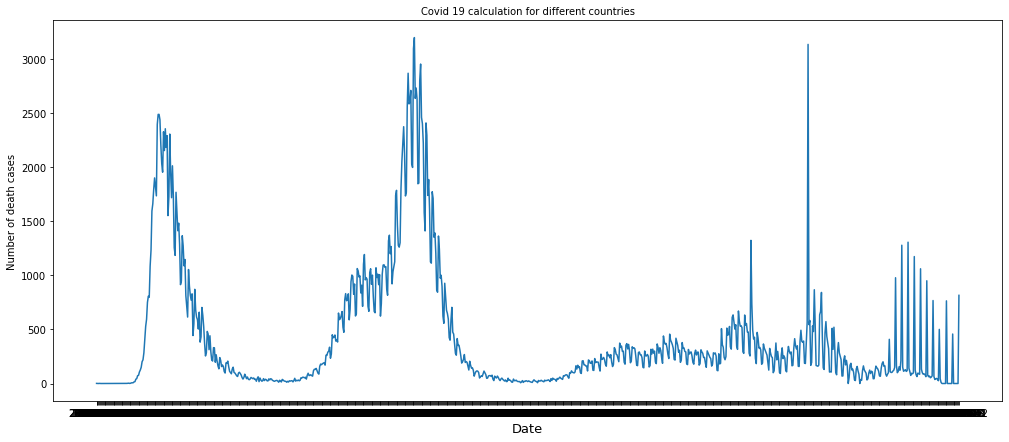

In [12]:
fig, ax = plt.subplots(1, figsize=(17,7))
plt.plot(data.index,data['new_deaths']);
ax.set_title("Covid 19 calculation for different countries", size=10)
ax.set_ylabel("Number of death cases", size=10)
ax.set_xlabel("Date", size=13)

Text(0.5, 0, 'Date')

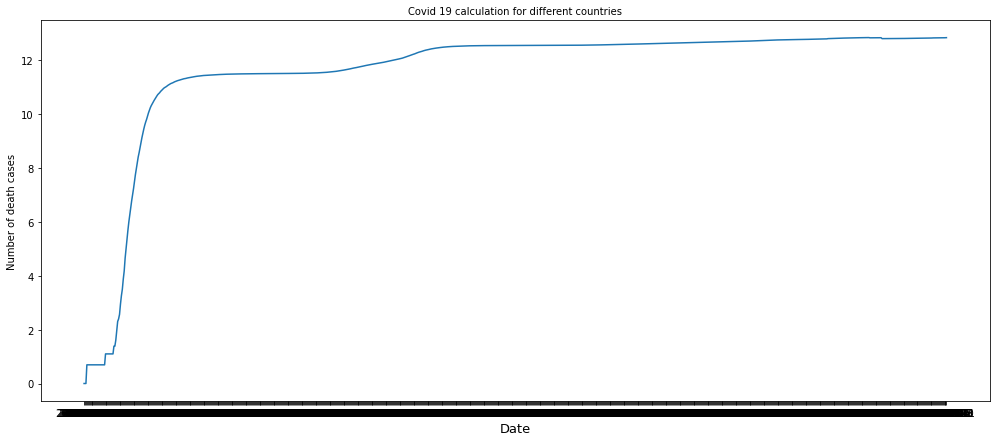

In [13]:
fig, ax = plt.subplots(1, figsize=(17,7))
plt.plot(data.index[:925],np.log(data['total_deaths'][:925]));
ax.set_title("Covid 19 calculation for different countries", size=10)
ax.set_ylabel("Number of death cases", size=10)
ax.set_xlabel("Date", size=13)

<AxesSubplot:xlabel='new_deaths', ylabel='Count'>

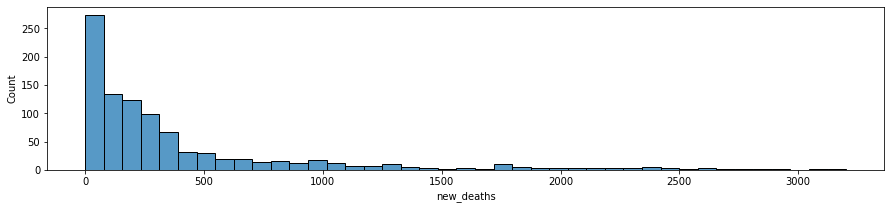

In [14]:

plt.figure(figsize=(15,3))
sns.histplot(data['new_deaths'])

# splitting of data into x and y

In [15]:
X=data.drop(columns=['total_deaths','new_deaths','new_cases'])
y=data['total_deaths']

In [16]:
pd.DataFrame(X)

,cancel_public_events,school_closing,restrictions_on_gathering,close_public_transport,stay_at_home_requirements,restrictions_on_internal_movement,international_travel_controls,income_support,debt/contract_relief,public_information_campaigns,...,day-6,day-7,day-8,day-9,day-10,day-11,day-12,day-13,day-14,day-15
date,,,,,,,,,,,,,,,,,,,,,
2020-01-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,379658.0,379658.0,379658.0,379658.0,379658.0,378893.0,378893.0,378893.0,378893.0,378893.0
2022-09-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,379658.0,379658.0,379658.0,379658.0,379658.0,379658.0,378893.0,378893.0,378893.0,378893.0
2022-09-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,379658.0,379658.0,379658.0,379658.0,379658.0,379658.0,379658.0,378893.0,378893.0,378893.0


## scaling data

In [17]:
scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)

# splitting data into train and test set

In [18]:
n = len(X)
X_train = X[0:int(n*0.8)]
X_test=X[int(n*0.8):]
y_train=y[0:int(n*0.8)]
y_test=y[int(n*0.8):]

In [19]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.0,...,0.920198,0.919622,0.919744,0.919106,0.918795,0.918532,0.917900,0.917244,0.916504,0.917496
769,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.0,...,0.920979,0.920198,0.920731,0.919744,0.919106,0.918795,0.918532,0.917900,0.917244,0.918354
770,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.0,...,0.921558,0.920979,0.921308,0.920731,0.919744,0.919106,0.918795,0.918532,0.917900,0.919096
771,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.0,...,0.921824,0.921558,0.922090,0.921308,0.920731,0.919744,0.919106,0.918795,0.918532,0.919753


# Model

In [20]:
model =SVR(C=1, coef0=10, degree=8, epsilon=0.05, gamma='auto', kernel='poly')

## fitting the model for train and test set

In [21]:
%%time
model.fit(X_train,y_train)

CPU times: user 3.17 s, sys: 33.9 ms, total: 3.21 s
Wall time: 3.5 s


SVR(C=1, coef0=10, degree=8, epsilon=0.05, gamma='auto', kernel='poly')

## prediction

In [22]:
y_pred=model.predict(X_test)

## evaluating model performance

In [23]:
score=mean_absolute_percentage_error(y_test, y_pred)
score

0.011754707521863647

In [24]:
y_pred.shape

(194,)

Text(0.5, 0, 'Date')

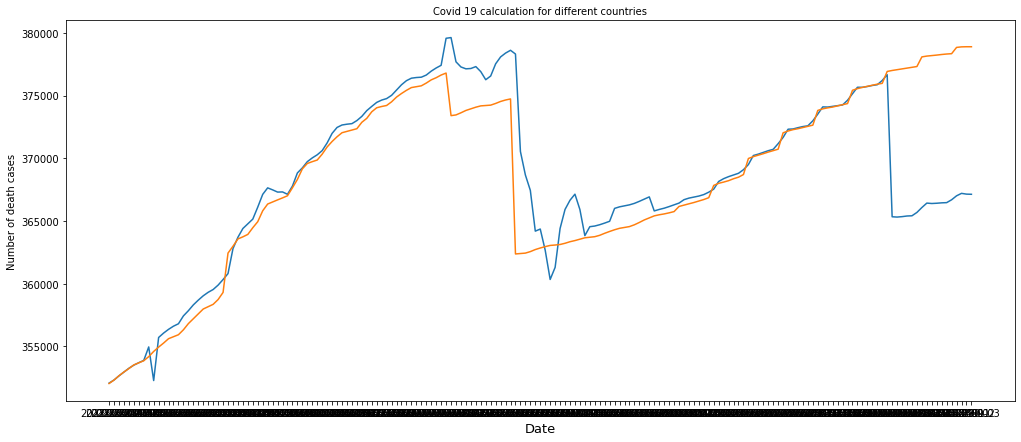

In [25]:
fig, ax = plt.subplots(1, figsize=(17,7))
plt.plot(y_test.index[:175],y_pred[:175]);
plt.plot(y_test.index[:175],y_test[:175]);
ax.set_title("Covid 19 calculation for different countries", size=10)
ax.set_ylabel("Number of death cases", size=10)
ax.set_xlabel("Date", size=13)